<a href="https://colab.research.google.com/github/tlkt/mofan_work/blob/master/403_RNN_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

In [0]:
steps = np.linspace(0,np.pi*2,100,dtype=np.float32)

In [0]:
x_np = np.sin(steps)
y_np = np.cos(steps)

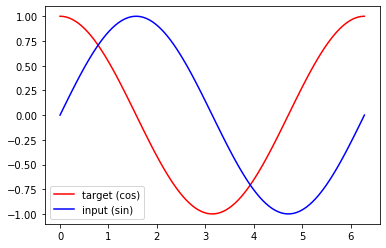

In [30]:
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [0]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN,self).__init__()
    self.rnn = nn.RNN(
        input_size=1,
        hidden_size=32,
        num_layers=2,
        batch_first=True
    )
    self.out = nn.Linear(32,1)
  
  def forward(self,x,h_state):
      r_out,h_state = self.rnn(x,h_state)

      outs = []

      for time_step in range(r_out.size(1)):
        outs.append(self.out(r_out[:,time_step,:]))
      return torch.stack(outs,dim=1),h_state

In [32]:
rnn = RNN()
rnn

RNN(
  (rnn): RNN(1, 32, num_layers=2, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)

In [0]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()

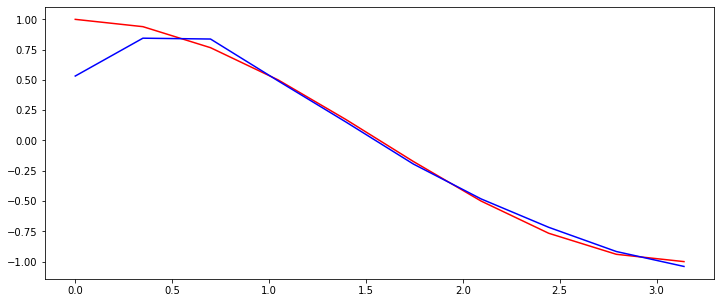

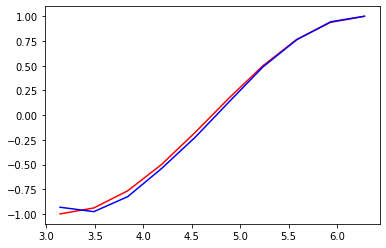

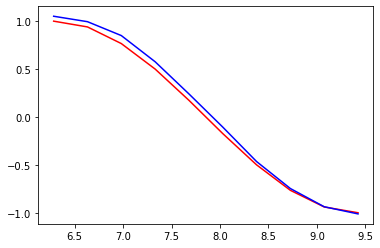

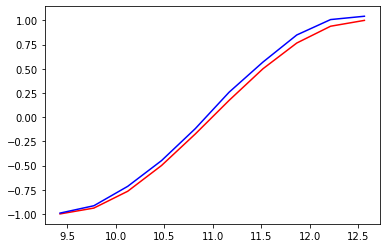

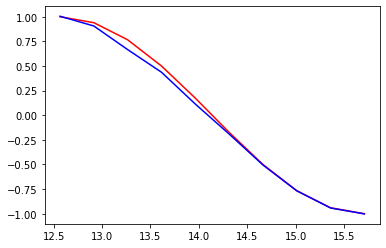

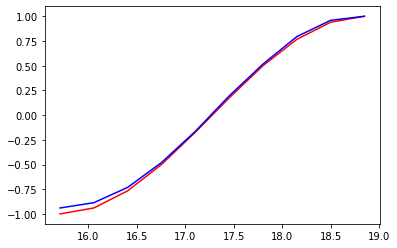

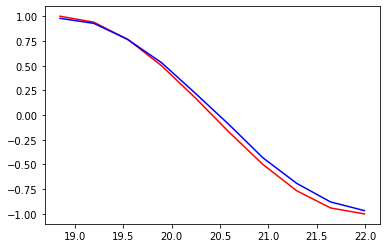

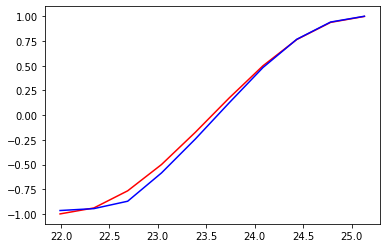

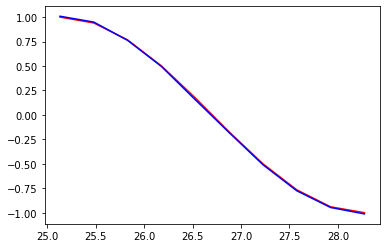

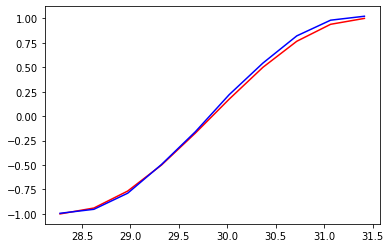

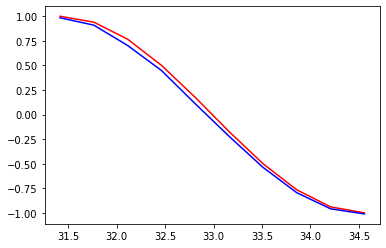

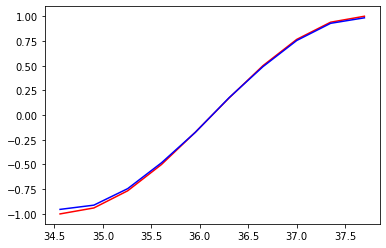

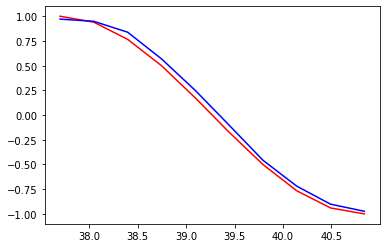

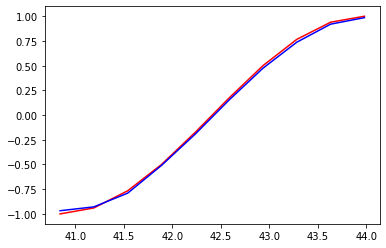

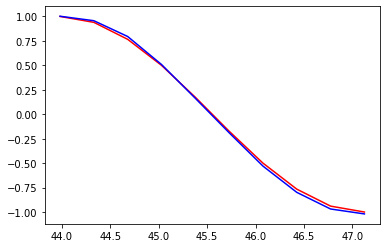

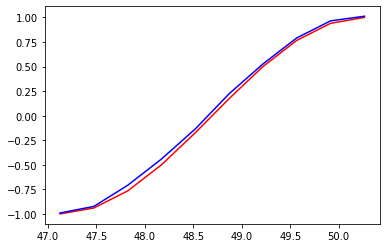

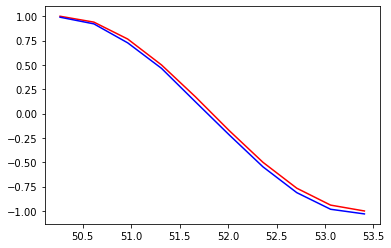

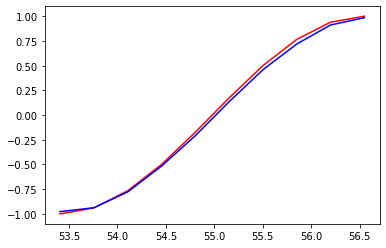

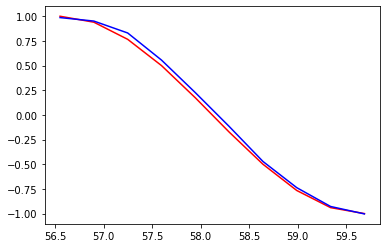

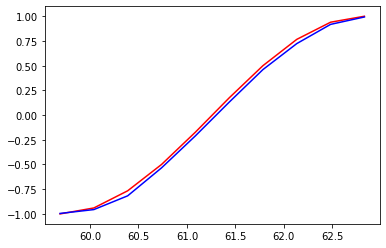

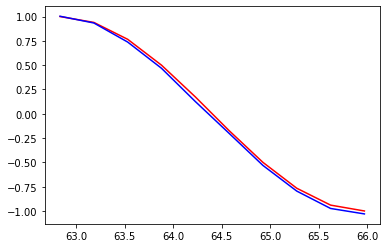

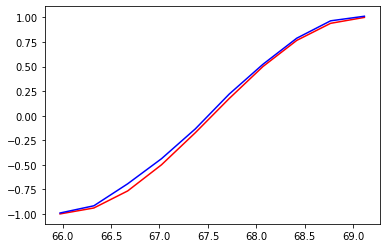

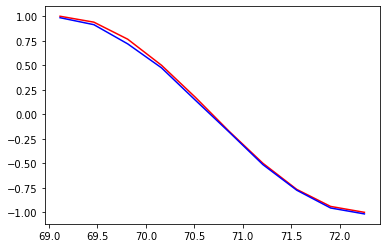

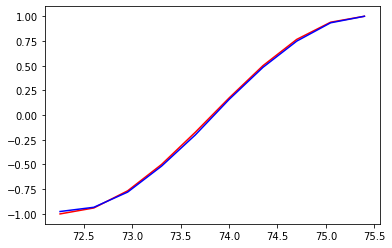

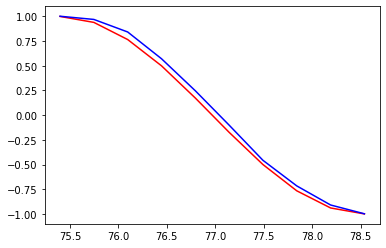

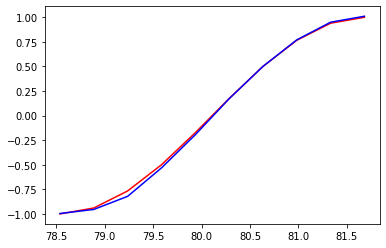

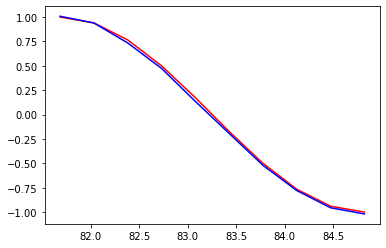

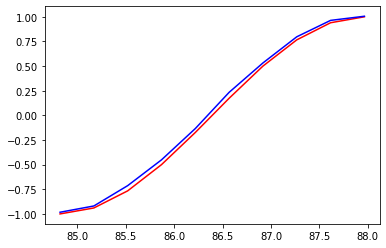

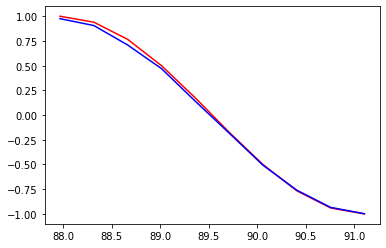

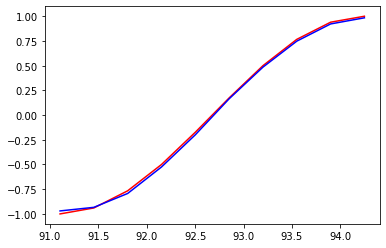

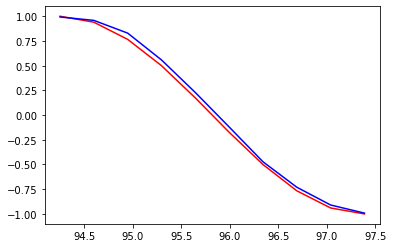

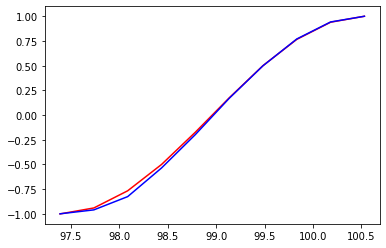

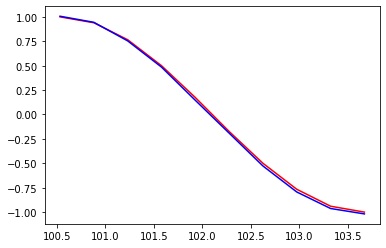

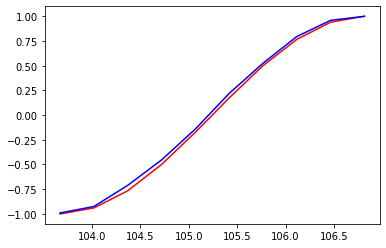

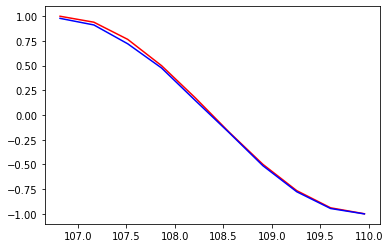

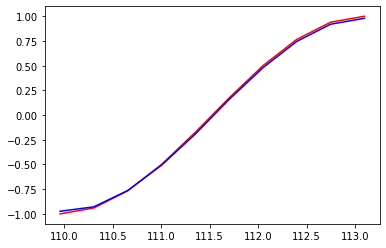

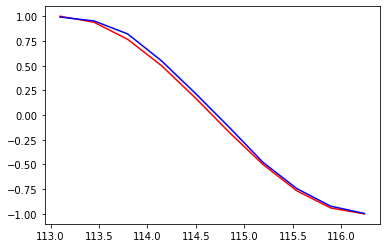

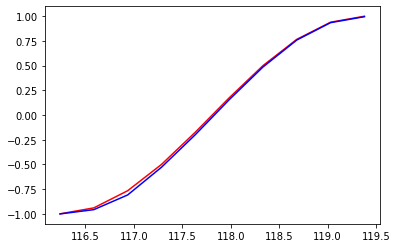

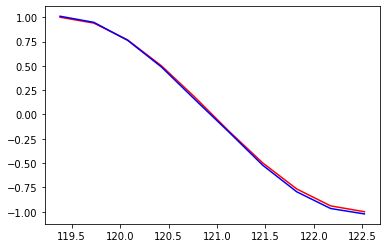

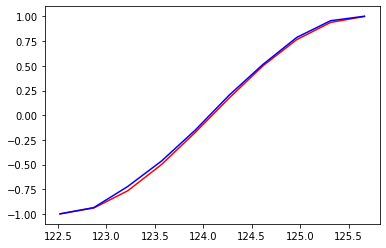

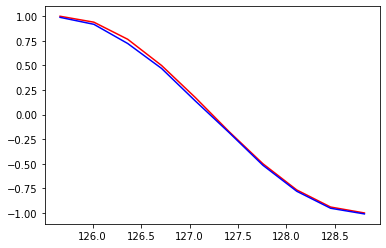

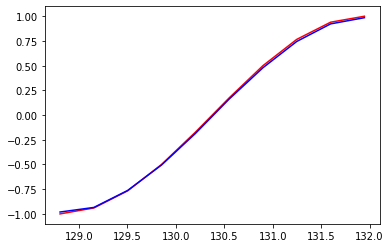

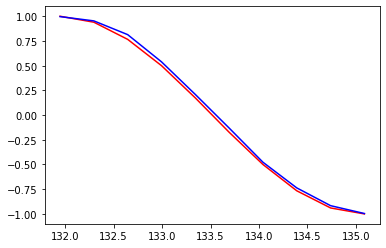

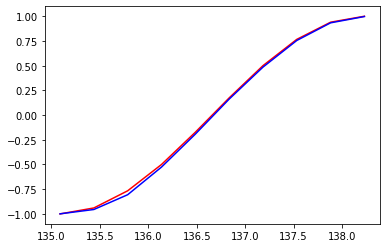

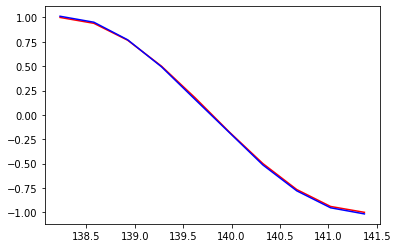

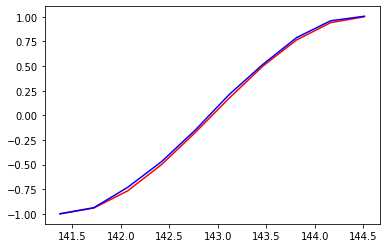

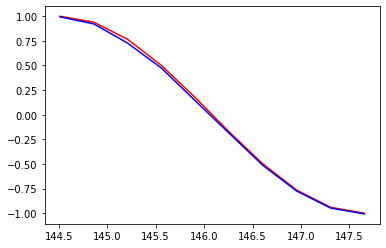

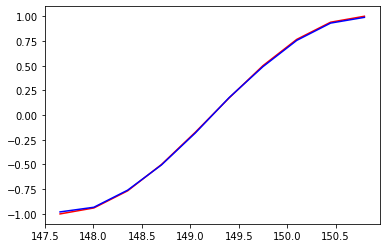

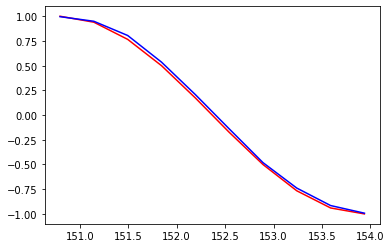

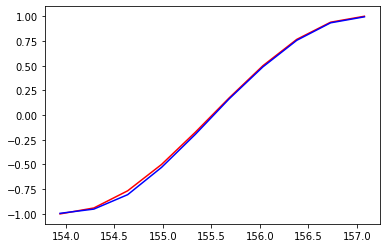

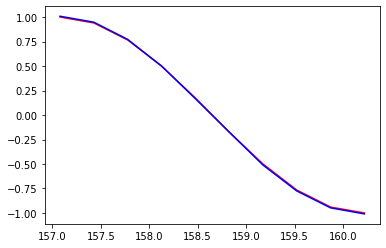

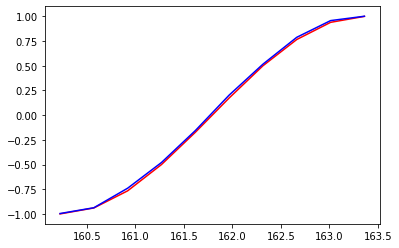

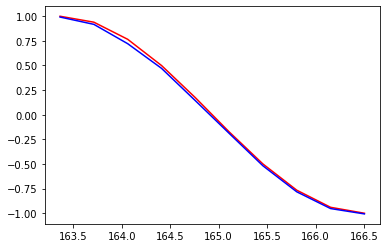

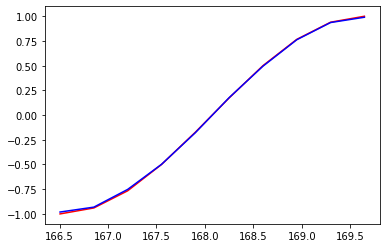

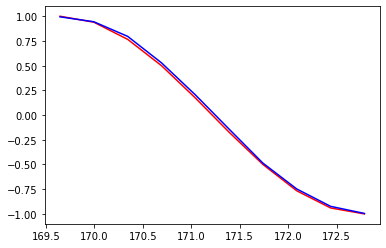

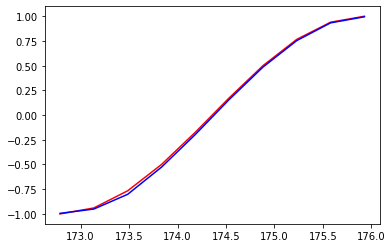

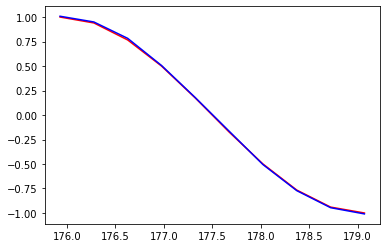

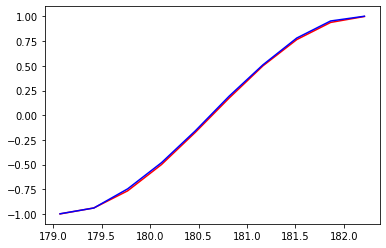

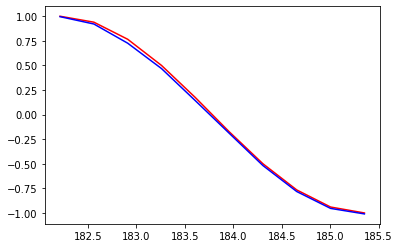

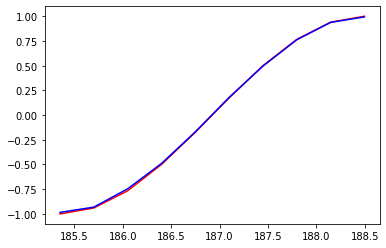

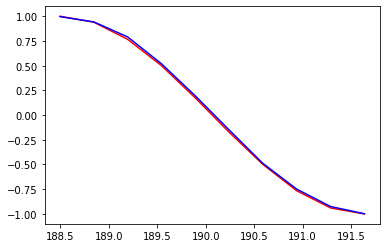

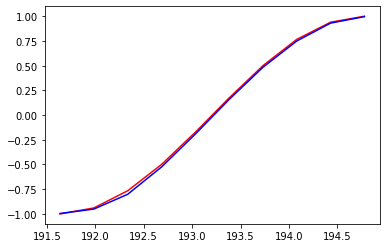

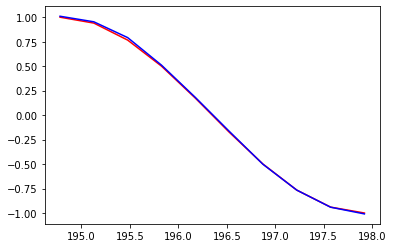

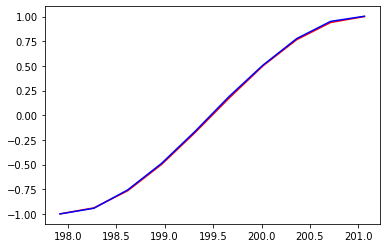

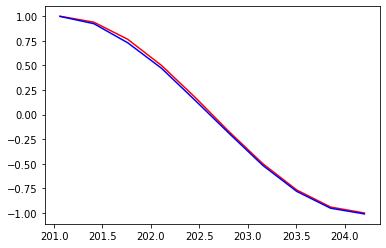

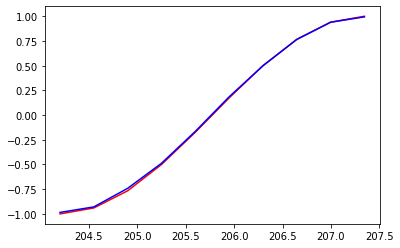

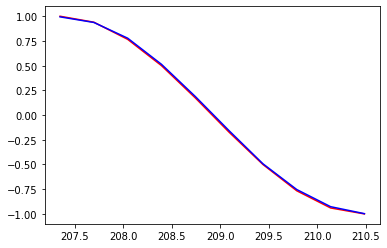

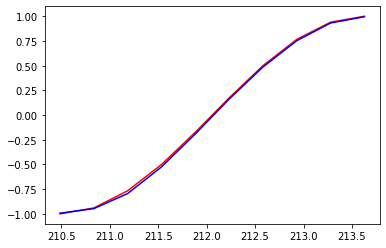

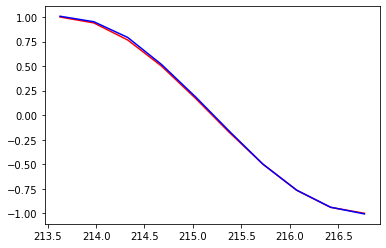

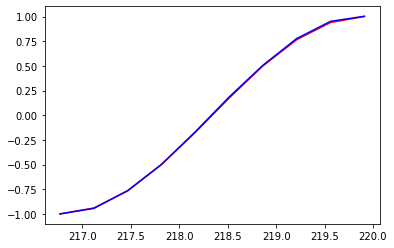

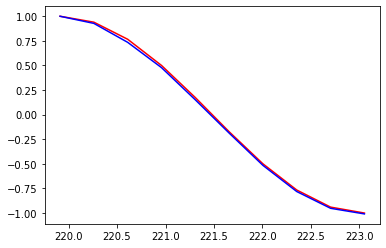

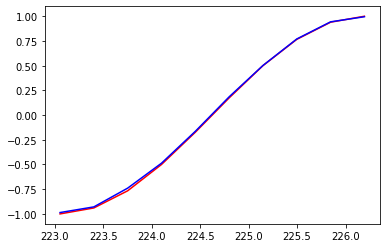

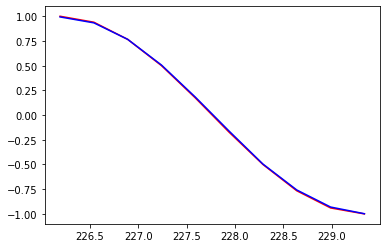

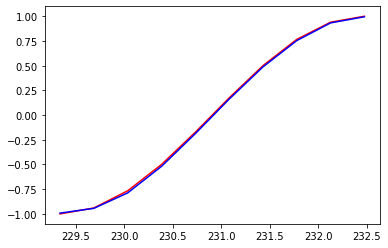

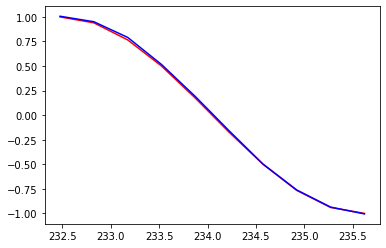

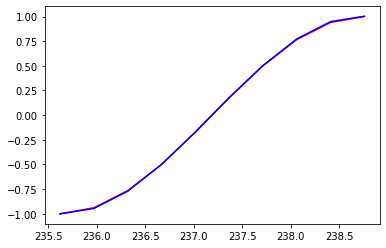

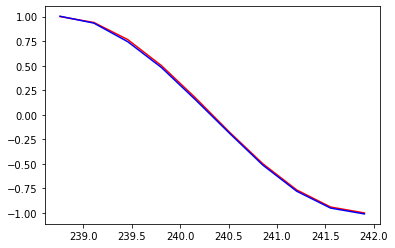

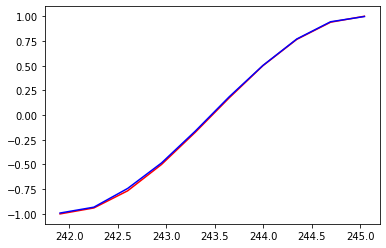

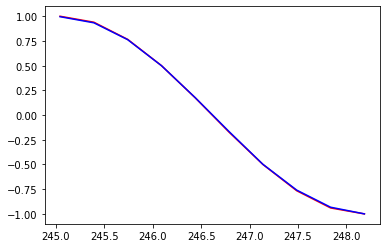

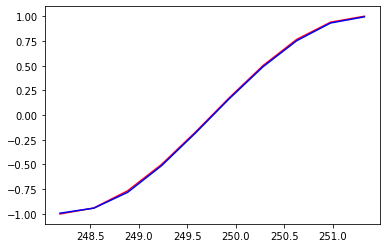

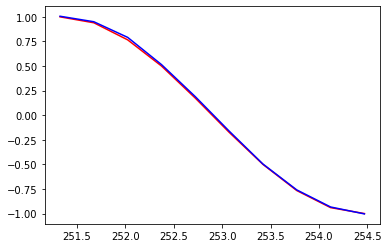

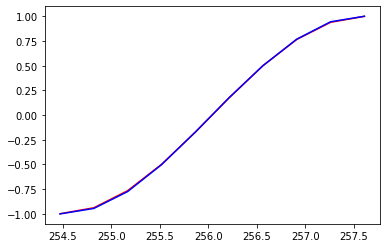

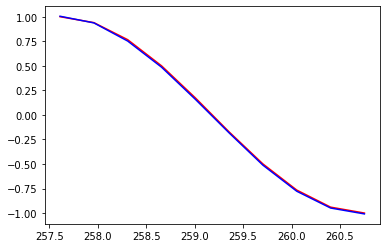

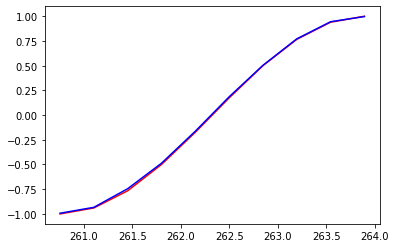

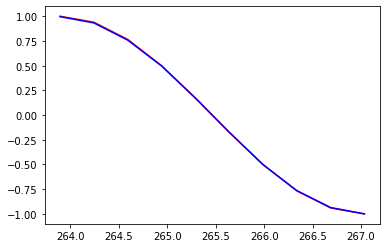

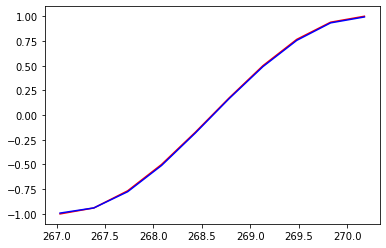

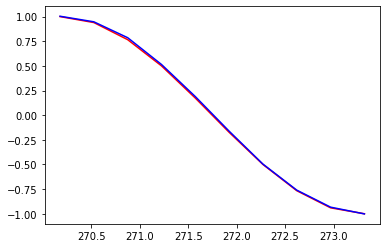

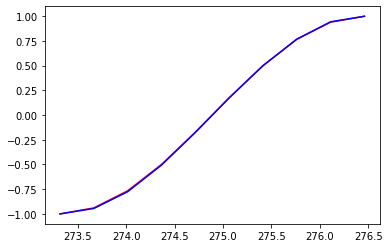

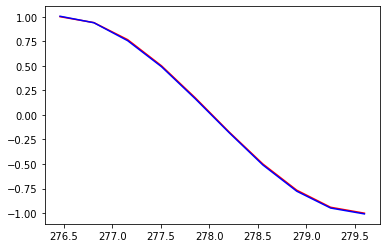

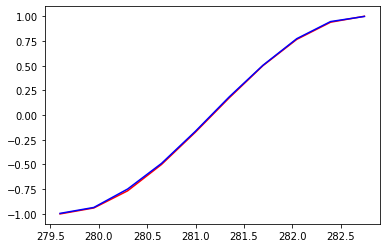

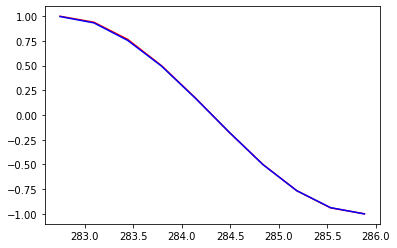

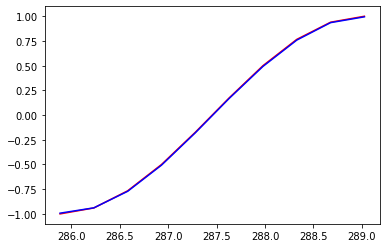

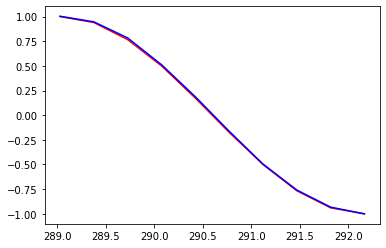

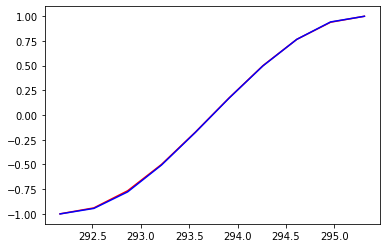

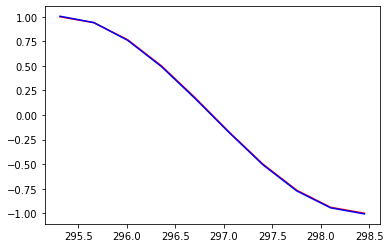

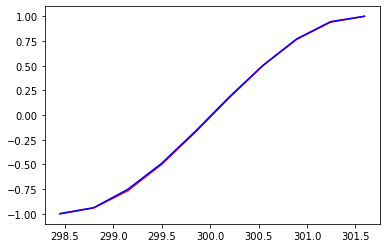

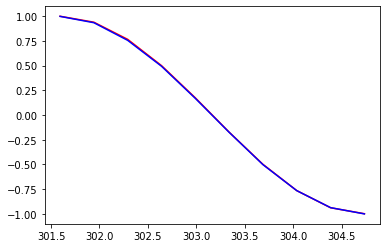

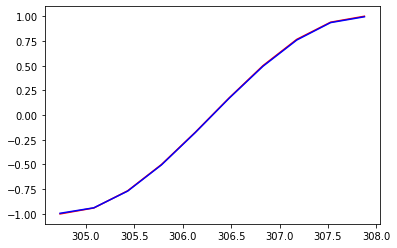

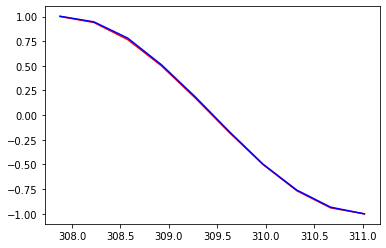

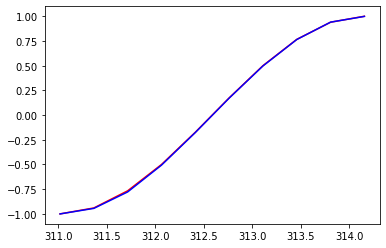

In [38]:
%matplotlib inline
# %matplotlib auto
h_state = None
plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot
for step in range(100):
  start,end = step*np.pi,(step+1)*np.pi
  steps = np.linspace(start,end,TIME_STEP,dtype=np.float32)
  x_np = np.sin(steps)
  y_np = np.cos(steps)

  x = torch.from_numpy(x_np[np.newaxis,:,np.newaxis])
  y = torch.from_numpy(y_np[np.newaxis,:,np.newaxis])

  prediction,h_state = rnn(x,h_state)
  h_state = h_state.data

  loss = loss_func(prediction,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  # plotting
  plt.plot(steps, y_np.flatten(), 'r-')
  plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
  plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()